In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn

In [100]:
img = cv2.imread("./images/img1.png")
size = (1280, 720)
img = cv2.resize(img, size)
org_img = img
cv2.imshow('image',img)
cv2.waitKey()
cv2.destroyAllWindows()

In [101]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
sensitivity = 70
lower_white = np.array([0,0,255-sensitivity])
upper_white = np.array([255,sensitivity,255])
mask = cv2.inRange(hsv, lower_white, upper_white)
res = cv2.bitwise_and(img,img, mask= mask)

img = res
cv2.imshow('image',res)
cv2.waitKey()
cv2.destroyAllWindows()

In [102]:
def roi(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask,vertices,255)
    masked = cv2.bitwise_and(img, mask)
    return masked

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kernel_size = 5
blur_gray = cv2.GaussianBlur(img_gray,(kernel_size, kernel_size),0)
cv2.imshow('image',blur_gray)
cv2.waitKey()
cv2.destroyAllWindows()
low_threshold = 80
high_threshold = 265
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
#roi_vertices = vertices = np.array([[0,500],[10,300], [300,200], [500,200], [800,300], [800,500]], np.int32)
roi_vertices = np.array([[340,700],[340,300], [250,80], [530,80], [880,300], [880,700]], np.int32)
processed_img = roi(edges, [roi_vertices])

cv2.imshow('image',processed_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [103]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 50  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40  # minimum number of pixels making up a line
max_line_gap = 35  # maximum gap in pixels between connectable line segments
line_image = np.copy(org_img) # * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(processed_img, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
line_m = []
y_max = 0
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,255,0),2)
        m = (y2-y1)/(x2-x1)
        line_m += [m]
        
        #get 
        if y1 > y_max:
            y_max = y1
            line_max = (x1,y1)
        if y2 > y_max:
            y_max = y2
            line_max = (x2,y2)
        
print("point with maximum y value (near bottom of screen): ",line_max)        
print("all m of lines: ",line_m)
mean_m = np.mean(line_m)
print("avergae m of lines: ",mean_m)

#Geradengleichung y = mx + n
#n = y-m*x
n = line_max[1] - mean_m * line_max[0]
print("average line n: ",n)


#draw line with average m from bottom point of all lines to edge of screen point
edge_screen_y = 150
edge_screen_x = (edge_screen_y - n)/mean_m
edge_point = (int(edge_screen_x),int(edge_screen_y))

cv2.circle(line_image,line_max,5,(255,0,255),5)   
cv2.circle(line_image,edge_point,5,(255,0,255),5)  
cv2.line(line_image,line_max,edge_point,(255,0,255),2)

#draw image center
cv2.circle(line_image,(int(size[0]/2),int(size[1]/2)),5,(255,255,255),5)        


cv2.imshow('image',line_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

point with maximum y value (near bottom of screen):  (533, 699)
all m of lines:  [-8.090909090909092, -7.666666666666667, -11.5, -7.181818181818182, -7.8, -8.3]
avergae m of lines:  -8.423232323232321
average line n:  5188.582828282827


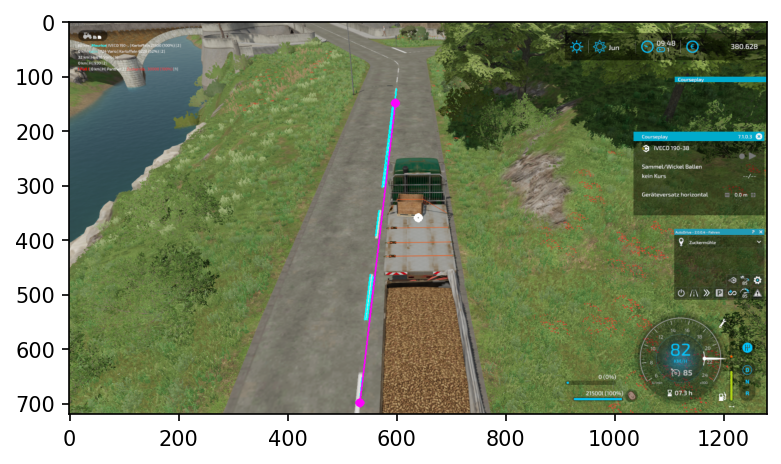

In [104]:
plt.figure(figsize=(6, 4), dpi=150)
plt_img = cv2.cvtColor(line_image,cv2.COLOR_BGR2RGB)
plt.imshow(plt_img)